# Método de Diferença em Difereneças (Difference-in-Differences)

Prof. Daniel de Abreu Pereira Uhr


## Conteúdo

* Introdução ao Método de Diferença em Diferenças
* Notações Gerais
* DD Canônico Simples (2x2)
* Hipóteses de Identificação
* Modelo DD por meio de Regressões
  * Modelo Canônico Simples (2x2)
  * Modelo Canônico Simples (2x2) com Controles
  * Modelo Canônico com Vários Períodos de Tempo e Controles
  * Modelo Canônico com Intervenção Aplicada em Dimensão Agregada, vários períodos de tempo e Controles 
  * Especificação Típica para Dados em Painel (Two-Way Fixed Effecs - TWFE)
* Evidências para a Hipótese de Tendências Paralelas
  * Event Study Design
* Aplicação em Python 1
* Aplicação em Python 2


## Referências

* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Roth, Sant´Anna, Bilinski and Poe (2023), What’s Trending in Difference-in-Differences? A Synthesis of the Recent Econometrics Literature.
* Joshua D. Angrist and Jörn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Facure, Matheus. Causal Inference for Brave and True. https://matheusfacure.github.io/python-causality-handbook/landing-page.html 
* [Avaliação Econômica de Projetos Sociais. Itaú Social, 2017](https://www.itausocial.org.br/wp-content/uploads/2018/05/avaliacao-economica-3a-ed_1513188151.pdf). Capítulos 1, 2 e 3. 
* Card and Krueger (1994). Minimum Wages and Employment: A Case Study of the Fast-Food Industry in New Jersey and Pennsylvania. American Economic Review, 84(4):772-793. (https://davidcard.berkeley.edu/papers/njmin-aer.pdf)
* Notas próprias.​

### Introdução ao Método de Diferença em Diferenças

O **método de diferenças em diferenças** (Difference-in-Differences / Diff-in-diff / DID / DD) é uma técnica econométrica utilizada para estimar o **efeito causal** de uma intervenção, política ou tratamento em um grupo de unidades observacionais ao longo do tempo. O método de DD é baseado no cálculo de uma dupla subtração: a primeira se refere à diferença das médias da variável de resultado entre os períodos anterior e posterior à intervenção para o grupo de tratamento e para o de controle, e a segunda se refere à diferença da primeira diferença calculada entre esses dois grupos. Naturalmente, a operacionalização do método requer a existência de informações para ambos os grupos para, pelo menos, um período de tempo antes e um período depois da intervenção. Pode ser utilizado tanto com **dados de painel** quanto com **dados seccionais** (cross-section) repetidos no tempo. Os primeiros tipicamente referem-se a informações de indivíduos, famílias ou empresas que são seguidos ao longo do tempo, enquanto os segundos são dados temporais calculados para unidades mais agregadas, tais como escolas, hospitais, setores de atividade, bairros, municípios ou estados.

Outra importante vantagem do método de DD é que ele permite o controle do viés de seleção por características não observáveis invariantes no tempo. 

#### Notações Gerais

A literatura não apresenta uma notação padrão para o método de DD. A tabela abaixo apresenta uma notação geralmente utilizada para o método de DD.


| Símbolo | Significado | 
|:-----: | :---------:|
|$$Y_{i,t} $$ | Variável de resultado para o indivíduo i no momento t|
|$$D_{i}=0 $$ | Indivíduos i que não receberam o tratamento (grupo de controle ou de comparação)|
|$$D_{i}=1 $$ | Indivíduos i que receberam o tratamento (grupo de tratamento)|
|$$t=1,..,t_0$$ | Períodos pré-tratamento (baseline)|
|$$t= t_0+1, ..., t$$ | Períodos pós-tratamento|
|$$Y_{i,t}(D=1) $$ | Resultado dos individuos i tratados no tempo t|
|$$Y_{i,t}(D=0) $$ | Resultado dos individuos i não tratados no tempo t|
|$$X$$ | Covariáveis|


#### DD Canônico Simples (2x2)

Para entender o método de forma mais rápida e clara, é importante começar com o modelo mais simples. Goodman-Bancon chama o método DD Canônico Simples de 2x2. Isto é, o caso de dois grupos e dois períodos de tempo. Então vamos utilizar a notação definida anteriormente para modelar nosso DD 2x2. $Y_{i,t}(0,0)$ denota o resultado potencial no período $t$ se $i$ permanece não tratado em ambos os períodos. Caso contrário, considere $Y_{i,t}(0,1)$ como o resultado potencial para a unidade $i$ no período $t$ se $i$ permanece não tratada no primeiro período mas é exposta ao tratamento no segundo período. Para simplificar a notação, podemos escrever $Y_{i,t}(0)= Y_{i,t}(0,0)$ e $Y_{i,t}(1)= Y_{i,t}(0,1)$.

Devido ao problema fundamental da inferência causal (Holland, 1986), nós observamos apenas um dos dois resultados possíveis para cada unidade $i$:

$$ Y_{i,t}= D_{i} Y_{i,t}(1) + (1-D_{i}) Y_{i,t}(0) $$


Onde o desenho do DD tem um grupo de tratamento ($D=1$) e um grupo de não tratados ($D=0$). Existe um período pré-tratamento ($t=1$) para o grupo tratado $Y_{i,t=1}(1)$, e um período pós tratamento $Y_{i,t=2}(1)$. O mesmo vale para o grupo de controle, $Y_{i,t=1}(0)$ e $Y_{i,t=2}(0)$.

$$ \hat{\beta}_{ATT}^{2x2} = (\overline{Y}_{i,t=2}(1) - \overline{Y}_{i,t=1}(1)) - (\overline{Y}_{i,t=2}(0) - \overline{Y}_{i,t=1}(0)) $$

onde o $\hat{\beta}_{ATT}^{2x2}$ é o ATT estimado para o grupo tratado $D=1$. $\overline{y}$ é a média amostral para aquele grupo específico em um determinado período de tempo.  

Vamos representar em termos de esperanças condicionais (assumindo uma amostragem de uma população grande):

$$ \hat{\beta}_{ATT}^{2x2} = (E[Y_{i,t=2}(1)|D_{i}=1] - E[Y_{i,t=1}(1)|D_{i}=1]) - (E[Y_{i,t=2}(0)|D_{i}=0] - E[Y_{i,t=1}(0)|D_{i}=0]) $$

Faremos um pequeno truque onde adicionamos zero ao lado direito para que possamos usar esses termos para ajudar a ilustrar algo importante.

$$ \hat{\beta}_{ATT}^{2x2} = \underbrace{(E[Y_{i,t=2}(1)|D_{i}=1] - E[Y_{i,t=1}(1)|,D_{i}=1]) - (E[Y_{i,t=2}(0)|D_{i}=0] - E[Y_{i,t=1}(0)|D_{i}=0])}_{\text{Switching Equation}} + \underbrace{(E[Y_{i,t=2}(0)|D_{i}=1] - E[Y_{i,t=2}(0)|D_{i}=1])}_{Zero} $$

Agora simplesmente reorganizamos esses termos para obter a decomposição em termos de resultados potenciais esperados condicionais.

$$ \hat{\beta}_{ATT}^{2x2} = \underbrace{(E[Y_{i,t=2}(1)|D=1] - E[Y_{i,t=2}(0)|D=1])}_{\beta_{ATT}} + \underbrace{[E[Y_{i,t=2}(0)|D=1] - E[Y_{i,t=1}(1)|D=1]] - (E[Y_{i,t=2}(0)|D=0] - E[Y_{i,t=1}(0)|D=0])}_{\text{Non-Parallel Trends Bias 2x2}} $$

Observe o lado direito da igualdade, mais especificadamente, o segundo termo da primeira parte , ele é o contrafactual. E como já dissemos várias vezes, os contrafactuais não são observáveis. Este resultado final é muitas vezes chamado de **suposição de tendências paralelas** e é, por definição, não testável, uma vez que não podemos observar esta expectativa condicional contrafactual. Voltaremos a isso novamente, mas por enquanto simplesmente apresento-o à sua consideração.



**Exemplo**

Considere duas empresas. No primeiro momento, o salário médio de uma das empresas é de 1000 (Ponto A), e da outra empresa é de 850 (ponto C). A primeira empresa aplica um Programa de Qualificação (tratamento) aos seus funcionários, enquanto a outra empresa não aplica qualquer programa. Posteriormente, observamos os salários das empresas, e a primeira empresa (Grupo Tratado) agora apresenta salários médios de 1100 (Ponto B), enquanto a empresa que não aplicou o programa (Grupo de controle) apresenta salários médios de 900 (Ponto D). A figura ilustra o exemplo.

<div style="text-align:center;">
    <img src="images\DD_FIG1.png"  alt="Imagem" style="width: 500px;"/>
</div>


Repare que caso a empresa tratada não tivesse aplicado o tratamento, esperaríamos que ela seguisse a trajetória de aumento dos salários conforme a empresa do grupo de controle (Ponto E). Assim, a diferença entre os salários que a empresa emprega após o tratamento (ponto B) e o valor que a empresa tratada teria caso não sofresse a política (Ponto E) representa o efeito causal da política.

O Gráfico pode ser escrito em uma tabela:


|  | Tratado | Controle | Diferença |
| :-----:   | :-----: | :-----: | :------: |
| Antes (Baseline) | $$\overline{Y}_{i,t=0}(1)=1000$$ Ponto (A) | $$\overline{Y}_{i,t=0}(0)=850$$ Ponto (C)  | $$\overline{Y}_{i,t=0}(1) - \overline{Y}_{i,t=0}(0) = 150 $$ |
| Depois (Followup) | $$\overline{Y}_{i,t=1}(1)=1100$$ Ponto (B) | $$\overline{Y}_{i,t=1}(0)=900$$ Ponto (D) | $$\overline{Y}_{i,t=1}(1) - \overline{Y}_{i,t=1}(0) = 200 $$ |
| Diferença | $$[\overline{Y}_{i,t=1}(1)-\overline{Y}_{i,t=0}(1)=100]$$ Trajetória do G.Tratado | $$[\overline{Y}_{i,t=1}(0)-\overline{Y}_{i,t=0}(0)=50]$$ Trajetória do G.Controle | $$ (\overline{Y}_{i,t=1}(1)-\overline{Y}_{i,t=0}(1)) - (\overline{Y}_{i,t=1}(0)-\overline{Y}_{i,t=0}(0))=50$$ Ponto B - E |


### Hipóteses de Identificação

O desafio para identificar o Efeito Médio do Tratamento Sobre os Tratados (Average Treatment Effect on the Treated - ATT) é que os resultados potenciais para os tratados caso eles não fossem tratados não são observáveis. Então o método DD resolve o problema ao imputar o valor da média contrafactual através do uso da 

* (a) trajetória da variável de resultado do grupo de controle, e 
* (b) dos valores da variável de resultado dos tratados no período baseline.

Hipóteses:

> 
> **Tendências Paralelas (Parallel Trends)**: Essa hipótese supõe que o valor médio da variável de resposta entre o estado contrafactual e seu valor no período baseline para os tratados segue a mestra trajetória do valor médio da variável de resposta do grupo de controle (lembre-se que no baseline ($t=1$), $Y_{i,1}(1) = Y_{i,1}(0)$).
> 
> $$E[Y_{i,2}(0)-Y_{i,1}(0)|D_{i}=1]=E[Y_{i,2}(0)-Y_{i,1}(0)|D_{i}=0]$$
> 
> **Não Antecipação dos Efeitos (No anticipatory effects)**: Essa hipótese supõe que o tratamento não tem efeito causal antes de sua implementação.
> $$ Y_{i,1}(0)=Y_{i,1}(1) $$
> 
> **Distribuição dos dados**: Seja $W_{i}=(Y_{i,2}, Y_{i,1}, D_{i})´$ o vetor das variáveis de resultados e do status do tratamento para a unidade $i$. Nós observamos uma amostra de N *i.i.d.* com $W_{i}$~$F$ para alguma distribuição F (desconhecida) satisfazendo as tendências paralelas. Em outras palavras, os dados observados são amostrados de uma população maior de forma independente e identicamente distribuída, onde cada observação segue a mesma distribuição.

Nosso interesse é identificar o chamado ***"Efeito do tratamento sobre os tratados"*** (*Average Treatment Effect on the Treated* - ATT), para o caso de dois períodoso (**Caso Simples**):

> 
> $$ \beta_{ATT}= E[Y_{i,2}(1)-Y_{i,2}(0)|D_{i}=1] $$
>

Ou seja, queremos a média da diferença entre a variável de resultado observada dos indivíduos $i$ do grupo que recebeu o tratamento e sua variável de resultado caso este indivíduo $i$ não tivesse recebido o tratamento (contrafactual), dado que estamos avaliando os tratados (condicional ao fato de serem tratados - $D_{i}=1$). Isso para o período 2, onde eles foram tratados.

### Modelo DD por meio de Regressões

#### Modelo Canônico Simples (2x2)

Chamaremos de DD canônico quando o tratamento ocorre em um único momento no tempo sobre um grupo de indivíduos específico (tratados). Vamos começar com o modelo mais simples (2x2), isto é com dois períodos de tempo - antes e depois da intervenção.

>
> $$ Y_{i,t}= \alpha + \beta_{1}.d_{t} + \beta_{2}.D_{i} + \beta_{3}(D_{i}.d_{t}) + \epsilon_{i,t} $$
> 

Note que $D_{i}$ e $d_{t}$ aparecem tanto individualmente, quanto interagidas. Suas presenças isoladas captam as diferenças da média de $Y_{i,t}$ entre o grupo de tratamento e controle e entre o período anterior e posterior à intervenção. O termo de interação capta o que ocorreu especificadamente com o grupo de tratamento no período pós-intervenção. O $\beta_{3}$ identifica o efeito do tratamento.

Graficamente:


<div style="text-align:center;">
    <img src="images\DD_FIG2.png"  alt="Imagem" style="width: 500px;"/>
</div>


#### Modelo Canônico Simples (2x2) com Controles

Agora vamos para o caso de incluir controles (constantes no tempo - posteriormente relaxaremos essa questão e veremos suas implicações). Elas podem absorver parte do efeito que, na ausência delas poderia ser atribuído à intervenção.

>
> $$ Y_{i,t}= \alpha + \beta_{1}.d_{t} + \beta_{2}.D_{i} + \beta_{3}(D_{i}.d_{t}) + X_{i}.\gamma + \epsilon_{i,t} $$
> 

**A inclusão do vetor de controles no modelo implica que a análise passa ser condicionada em $X_{i}$**, de modo que a os resultados são condicionais $E[Y_{i,t}|D,X,t]$. Essa consideração impõe que as tendências de cada $X$ do grupo tratado seja igual a tendência das variáveis $X$ do grupo de controle. Somente assim, o $\beta_{3}$ continua identificando o efeito do tratamento. Para evitar, consideramos aqui apenas os controles constantes no tempo.

Abordaremos com mais detalhes a questão dos controles na próxima aula.

#### Modelo Canônico com Vários Períodos de Tempo e Controles

Agora vamos expandir a análise para o caso em que há disponibilidade para vários períodos de tempo, $t=1,2,…,T$

>
> $$ Y_{i,t}= \alpha + \lambda_{t} + \theta.D_{i} + \beta_{3}(D_{i}.d_{t}) + X_{i}.\gamma + \epsilon_{i,t} $$
> 

Graficamente:

<div style="text-align:center;">
    <img src="images\DD_FIG3.png"  alt="Imagem" style="width: 500px;"/>
</div>

Note que haverá diversas variáveis binárias identificando cada ano específico $t$.

#### Modelo Canônico com Intervenção Aplicada em Dimensão Agregada, vários períodos de tempo e Controles 
Repare que a intervenção é aplicada numa dimensão agregada ($g$). Esse tipo de análise pode ser aplicada, por exemplo, quando nos deparamos com dados desagregados em nível individual, e nos deparamos com possíveis agregações como escolas, setores, municípios ou estados... Ou seja, queremos verificar o efeito de uma intervenção aplicada no nível agregado sobre a média da variável de resultado dos indivíduos $i$.

>
> $$ Y_{i,g,t}= \alpha + \mu_{g} + \lambda_{t} + \theta.D_{g,t} +  X_{g}.\gamma + \epsilon_{i,g,t} $$
> 

Note que haverá diversas dummies para controlar os grupos $\mu_{g}$. Além disso, a variável $D_{g,t}$ que assume valor um caso o indivíduo $i$ é tratado no período $t$. 

#### Especificação Típica para Dados em Painel (Two-Way Fixed Effecs - TWFE)

Nessa especificação controla-se o efeito fixo individual, que representa o elemento que absorve a influência de qualquer característica (observável e não observável) constante no tempo sobre a variável de resultado. 

>
> $$ Y_{i,t}= \alpha_{i} + \lambda_{t} + \beta.D_{i,t} + X_{i,t}.\gamma + \epsilon_{i,t} $$
> 

A variável $D_{i,t}$ que assume valor um caso o indivíduo $i$ é tratado no período $t$. No contexto de múltiplos períodos, essa variável cumpre o papel do termo de interação anterior. O método de DD é capaz de contornar o problema de viés de seleção associado às características fixas (observáveis ou não) dos indivíduos no tempo.

**Neste modelo TWFE permitimos que as covariáveis se modifiquem no tempo apenas para formulação da equação econométrica, porque a introdução de covariáveis na forma linear não é apropriada se o tratamento apresenta efeitos distintos em diferentes grupos da população.**


### Inferência

Muitos estudos que empregam estratégias de DD utilizam dados de muitos anos – não apenas um período pré-tratamento e um período pós-tratamento (Canônico Simples - 2x2). As variáveis ​​de interesse em muitas dessas configurações variam apenas no nível do grupo, como o estado, e as variáveis ​​de resultado são frequentemente correlacionadas em série. 

Bertrand, Duflo e Mullainathan (2004) salientam que os erros padrão convencionais muitas vezes subestimam gravemente o desvio padrão dos estimadores e, portanto, os erros padrão são tendenciosos para baixo, “muito pequenos”, e, portanto, rejeitam excessivamente a hipótese nula. Bertrand, Duflo e Mullainathan (2004) propõem as seguintes soluções:

* Agregar os dados em um período pré e um pós.
* Clustering de erros padrão no nível do grupo.
  * Você simplesmente ajusta os erros padrão agrupando-os no nível do grupo.

### Evidências para a Hipótese de Tendências Paralelas

#### Event Study Design

Quando temos um painel com a dimensão temporal mais longa, é possível termos uma evidência da hipótese de tendências paralelas por meio do chamado **Event Study Design**. Nesse caso, o modelo é estimado para cada período de tempo, e o **coeficiente de interesse é plotado em função do tempo**. **Se a hipótese de tendências paralelas for válida, os coeficientes estimados devem ser próximos de zero para os períodos anteriores ao tratamento, e próximos do valor do efeito causal para os períodos posteriores ao tratamento**.

Considere o modelo de Diff-in-Diff (TWFE) com múltiplos períodos e tratamento: 


>
> $$ Y_{i,t}=  \beta.D_{i,t} + \alpha_{i} + \lambda_{t} + \epsilon_{i,t} $$
> 


Onde $Y_{i,t}$ é a variável de resultado; $D_{i,t}$ é a variável de tratamento indicativa, onde assume valor 1 no primeiro momento da intervenção, e permanece com esse valor posteriormente. $\alpha_{i}$ é o efeito fixo individual; e $\lambda_{t}$ é o efeito fixo temporal. **Sabemos que essa estrutura é flexivel e pode apresentar tanto o tratamento iniciando em um único momento do tempo (modelo canônico), quanto o tratamento iniciando em diferentes momentos no tempo**.

Assim, no **Event Study** procura-se identificar as diferentes magnitudes do impacto decorrente do evento (intervenção) para cada ano específico (*“Efeitos heterogêneos do tratamento no tempo”*). Ou seja, desagregamos o efeito médio sobre os tratados $D_{i,t}$, em efeitos heterogêneos temporais específicos $\sum_{t=0}^{m}[\beta_{t} D_{i,t}]$. Logo, não queremos verificar apenas o efeito médio do tratamento nos tratados (ATT), mas **verificar como se dá esse efeito durante o período pós-intervenção**. 

O Event Study desagrega o efeito médio do tratamento sobre os tratados (ATT) no tempo conforme a seguinte equação:

$$ 𝑌_{𝑖𝑡} = \sum_{t=-q}^{−1}[\phi_{t} D_{i,t}] + \sum_{t=0}^{m}[\beta_{t} D_{i,t}] + \alpha_{i} + \lambda_{t} +\epsilon_{𝑖𝑡}$$

$D_{i,t}$ é uma função indicadora para os tratados, em cada ano dentro da janela do evento. Tanto antes (*leads*), quanto depois da intervenção (*lag*). Podemos analisar graficamente o efeito. E, também, podemos definir os efeitos de curto prazo (por ex., 0, 1, 2 anos) e longo prazo (por exemplo, 3, 4, 5 anos). 

Lembre que o  ATT é a média do período posterior à intervenção ($\beta_{t}$).

Essa estrutura do DD também é conhecido na literatura como **Dynamic Difference-in-Differences**

**A hipótese de tendências paralelas fica evidenciada quando o período pré-intervenção não apresenta efeito significativo, e o período pós-intervenção apresenta efeito significativo.**


### Aplicação DD em Python 1

Para compreender esse exemplo precisamos lembrar da definição de **Monopsônio**. Considere, por exemplo, um monopsônio em um mercado de contratação de insumos, como o mercado de mão de obra, refere-se à situação em que há um único comprador (ou empregador) dominante (A demanda pela mão de obra é dessa empresa) que enfrenta múltiplos vendedores (ou trabalhadores). Nesse cenário, o empregador tem um grande poder de mercado e pode ditar as condições de contratação, incluindo os salários que está disposto a pagar e as quantidades de trabalhadores que deseja empregar.

Uma premissa básica é que as empresas sempre buscam maximizar seu lucro. Elas realizam isso ao igualar custo marginal e receita marginal. O custo marginal de contratar um trabalhador adicional é o salário que a empresa deve pagar a esse trabalhador. A receita marginal é o valor que a empresa obtém com a produção adicional desse trabalhador.


<div style="text-align:center;">
    <img src="images\Monopsonio1.png"  alt="Imagem" style="width: 500px;"/>
</div>

* Suponha que você esteja interessado no **efeito dos salários mínimos sobre emprego**, que é uma questão clássica e polêmica.
* No **Monopsônio (mercados de trabalho imperfeitos)** um aumento de salários mínimos podem sugerir um efeito oposto, em que o aumento do salário mínimo aumenta o emprego.

É aqui que entra o artigo de **Card e Krueger (1994)**. Eles pesquisaram cerca de 400 lojas de fast food em Nova Jersey (NJ) e Pensilvânia (PA) antes e depois do aumento do salário mínimo ocorrido em Nova Jersey.

Vejamos isso em termo teóricos:

<div style="text-align:center;">
    <img src="images\DD_FIG4.png"  alt="Imagem" style="width: 500px;"/>
</div>




Voltando à análise de Card e Krueger (1994), em fevereiro de 1992, Nova Jersey aumentou o salário mínimo estadual
de US4,25 a US5,05. Enquanto o salário mínimo da Pensilvânia permaneceu em US4,25.



<div style="text-align:center;">
    <img src="images\DD_FIG5.png"  alt="Imagem" style="width: 500px;"/>
</div>

Eles pesquisaram cerca de 400 lojas de fast food em Nova Jersey (NJ) e Pensilvânia (PA) antes e depois do aumento do salário mínimo em Nova Jersey.

O Gráfico abaixo mostra a distribuição dos salários nas lojas de cada estado antes da intervenção.

<div style="text-align:center;">
    <img src="images\DD_FIG6.png"  alt="Imagem" style="width: 500px;"/>
</div>

O gráfico abaixo mostra a distribuição dos salários após a intervenção ocorrida em New Jersey.

<div style="text-align:center;">
    <img src="images\DD_FIG7.png"  alt="Imagem" style="width: 500px;"/>
</div>

Temos uma situação de antes e depois, para um estado tratado e outro controle. Vejamos a tabela com as médias e suas diferenças:

<div style="text-align:center;">
    <img src="images\DD_FIG8.png"  alt="Imagem" style="width: 500px;"/>
</div>

Surpreendentemente, o emprego aumentou em NJ em relação ao PA após a mudança do salário mínimo - isso é consistente com a teoria do monopsônio!


A regressão para capturar o efeito causal da intervenção:

>
> $$ Y_{i,t,s}= \alpha + \gamma NJ_{s} + \lambda d_{t} + \delta (NJ.d)_{st} + \epsilon_{i,t,s} $$
> 

* $NJ$ é uma variável binária com valor 1 se as observações são do estado NJ;
* $d$ é uma variável binária com valor 1 se as observações são de novembro (pós | período posterior ao tratamento)
* Dimensões consideradas nos dados ($i, t, s$). o subscrito $i$ indica a loja, o subscrito $t$ indica o tempo, o subscrito $s$ o estado.



Graficamente:

<div style="text-align:center;">
    <img src="images\DD_FIG9.png"  alt="Imagem" style="width: 500px;"/>
</div>


* Se as tendências paralelas não forem mantidas, o ATT não será identificado

* Mas, independentemente de o ATT ser identificado, o OLS sempre estima a mesma coisa

* Isso ocorre porque o OLS usa a inclinação do grupo de controle para estimar o parâmetro DD, que só é imparcial se essa inclinação for a correta tendência contrafactual para o grupo de tratamento

Agora vamos aplicar o exemplo em Python.

In [1]:
# Pacotes
import numpy as np
import pandas as pd
import plotnine as p
import statsmodels.api as sm
import linearmodels as lm
import statsmodels.formula.api as smf

In [2]:
# DataFrame
df = pd.read_stata("http://fmwww.bc.edu/repec/bocode/c/CardKrueger1994.dta")

# Há problemas na base que precisam ser ajustados
df.loc[(df['id'] == 407) & (df['kfc'] == 1), 'id'] = 408
# Crie a variável 'tratado' com valor inicial de 0
df['tratado'] = 0
# Recodifique 'tratado' para 1 se 'treated' for igual a 1
df.loc[df['treated'] == 'NJ', 'tratado'] = 1
# Crie a variável 'effect' como o produto entre 'tratado' e 't'
df['effect'] = df['tratado'] * df['t']

In [3]:
# Regressão DD
CK1 = smf.wls('fte ~ tratado + t + effect', data=df).fit(cov_type='HC1')
print(CK1.summary())

                            WLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.008
Model:                            WLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.429
Date:                Sat, 23 Nov 2024   Prob (F-statistic):              0.233
Time:                        15:36:32   Log-Likelihood:                -2894.8
No. Observations:                 801   AIC:                             5798.
Df Residuals:                     797   BIC:                             5816.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9487      1.317     15.144      0.0

In [5]:
# Regressão DD com covariáveis
CK2 = smf.wls('fte ~ tratado + t + effect + bk + kfc + roys', data=df).fit(cov_type='HC1')
print(CK2.summary())

                            WLS Regression Results                            
Dep. Variable:                    fte   R-squared:                       0.188
Model:                            WLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     57.30
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           6.91e-59
Time:                        15:36:38   Log-Likelihood:                -2814.7
No. Observations:                 801   AIC:                             5643.
Df Residuals:                     794   BIC:                             5676.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.1607      1.307     16.188      0.0

Podemos montar uma tabela para para comparar os efeitos encontrados em cada estratégia de identificação DD:

In [6]:
from statsmodels.iolib.summary2 import summary_col
results_table = summary_col([CK1, CK2], model_names=['CK1', 'CK2'], stars=True)
print(results_table)


                  CK1        CK2    
------------------------------------
Intercept      19.9487*** 21.1607***
               (1.3173)   (1.3071)  
tratado        -2.8835**  -2.3239*  
               (1.4033)   (1.2537)  
t              -2.4065    -2.4027*  
               (1.5941)   (1.4103)  
effect         2.9140*    2.9350*   
               (1.7368)   (1.5434)  
bk                        0.9169    
                          (0.9383)  
kfc                       -9.2049***
                          (0.8991)  
roys                      -0.8970   
                          (1.0411)  
R-squared      0.0080     0.1878    
R-squared Adj. 0.0043     0.1817    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### Aplicação DD em Python 2


<div style="text-align:center;">
    <img src="images\DD_FIG16.png"  alt="Imagem" style="width: 500px;"/>
</div>



A ideia do artigo de Stevenson and Wolfers (2006) é aproveitar que o momento diferente da reforma da lei do divórcio entre os estados fornece um quase-experimento útil para examinar os efeitos dessa mudança. Eles analisam os dados em painel estadual para estimar as mudanças nas taxas de suicídio, violência doméstica e homicídio conjugal decorrentes da mudança na lei do divórcio.

Veremos questões teóricas do tratamento em diferentes momentos do tempo de forma mais detalhada na próxima seção. Agora, com a estrutura dos dados do artigo em mente, podemos pensar em montar o **Dynamic Difference-in-Differences** através da técnica de **Event Study**.


In [7]:
data = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bacon_example.dta")

# Filtragem dos dados
# Vamos criar identificadores estaduais
data['id'] = data.groupby('stfips').grouper.group_info[0] + 1
# Criar uma nova variável de tempo "time"
data['time'] = data['year'] - 1963

# Outcome (Suicide Mortality)
Y = data['asmrs']
# Treatment
data['D'] = data['post']

# Possíveis Covariáveis - 'pcinc', 'asmrh', 'cases'
data['_nfd'].describe()

C:\Users\danie\AppData\Local\Temp\ipykernel_22352\1674332887.py:5: FutureWarning: DataFrameGroupBy.grouper is deprecated and will be removed in a future version of pandas.


count    1188.000000
mean     1973.583333
std         3.539969
min      1969.000000
25%      1971.000000
50%      1973.000000
75%      1974.250000
max      1985.000000
Name: _nfd, dtype: float64

In [8]:
# Regressão controlando os efeitos fixos id e ano, com erro padrão robusto à heterocedasticidade.
reg = smf.wls('asmrs ~ D + C(stfips) + C(year)', data=data).fit(cov_type='HC1')
print(reg.summary())

                            WLS Regression Results                            
Dep. Variable:                  asmrs   R-squared:                       0.701
Model:                            WLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     41.44
Date:                Sat, 23 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:36:46   Log-Likelihood:                -6131.8
No. Observations:                1617   AIC:                         1.243e+04
Df Residuals:                    1535   BIC:                         1.287e+04
Df Model:                          81                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            42.5023      2.41

O efeito para D foi: -3.0799. Podemos programar para ter o resultado mais direto.


In [9]:
# Regressão controlando os efeitos fixos id e ano, com erro padrão robusto à heterocedasticidade.
smf.wls('asmrs ~ 1 + D + C(stfips) + C(year)', data=data).fit(cov_type='HC1').summary2().tables[1].loc[['Intercept', 'D'], :]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,42.502322,2.412077,17.620632,1.710817e-69,37.774738,47.229905
D,-3.079926,1.267705,-2.429529,1.511846e-02,-5.564582,-0.595270


Vejamos como construir o gráfico do Event Study para o artigo de Stevenson and Wolfers (2006).

In [10]:
# Criar uma variável de tempo até o ano do início do tratamento (Tempo em relação ao início do evento)
data['timeToTreat'] = data['year'] - data['_nfd']
data['timeToTreat'].describe()

count    1188.000000
mean        6.416667
std        10.162403
min       -21.000000
25%        -2.000000
50%         6.000000
75%        15.000000
max        27.000000
Name: timeToTreat, dtype: float64

Repare que vai de -21 à 27. Temos 21 Leads e 27 Lags.

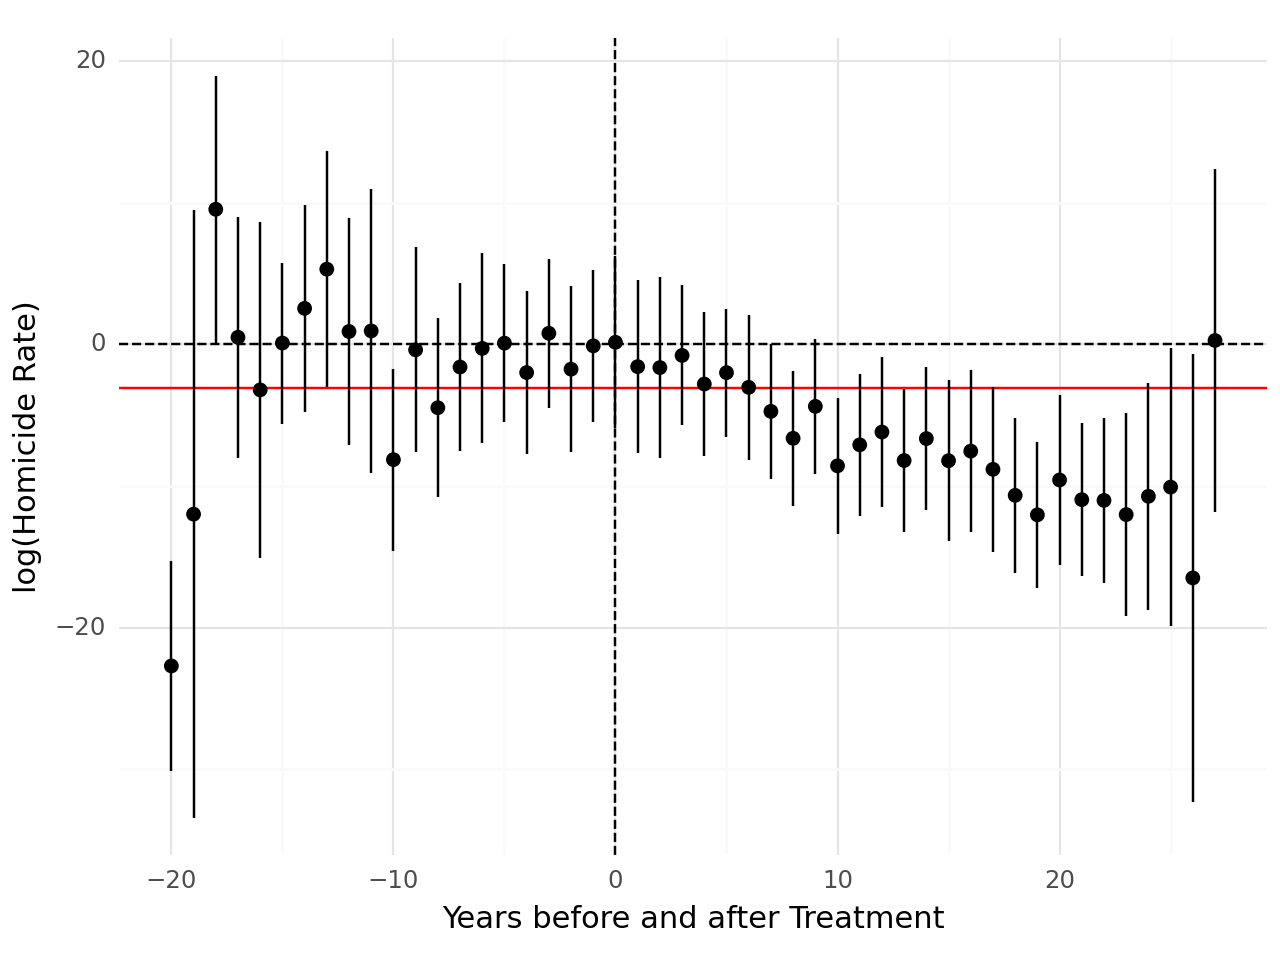

<Figure Size: (640 x 480)>

In [11]:
# Criando as variáveis desagregadas do efeito de D manualmente:

data['lead1'] = data['timeToTreat'] == -1
data['lead2'] = data['timeToTreat'] == -2
data['lead3'] = data['timeToTreat'] == -3
data['lead4'] = data['timeToTreat'] == -4
data['lead5'] = data['timeToTreat'] == -5
data['lead6'] = data['timeToTreat'] == -6
data['lead7'] = data['timeToTreat'] == -7
data['lead8'] = data['timeToTreat'] == -8
data['lead9'] = data['timeToTreat'] == -9
data['lead10'] = data['timeToTreat'] == -10
data['lead11'] = data['timeToTreat'] == -11
data['lead12'] = data['timeToTreat'] == -12
data['lead13'] = data['timeToTreat'] == -13
data['lead14'] = data['timeToTreat'] == -14
data['lead15'] = data['timeToTreat'] == -15
data['lead16'] = data['timeToTreat'] == -16
data['lead17'] = data['timeToTreat'] == -17
data['lead18'] = data['timeToTreat'] == -18
data['lead19'] = data['timeToTreat'] == -19
data['lead20'] = data['timeToTreat'] == -20
data['lead21'] = data['timeToTreat'] == -21

data['lag0'] = data['timeToTreat'] == 0 
data['lag1'] = data['timeToTreat'] == 1 
data['lag2'] = data['timeToTreat'] == 2 
data['lag3'] = data['timeToTreat'] == 3 
data['lag4'] = data['timeToTreat'] == 4 
data['lag5'] = data['timeToTreat'] == 5 
data['lag6'] = data['timeToTreat'] == 6 
data['lag7'] = data['timeToTreat'] == 7 
data['lag8'] = data['timeToTreat'] == 8 
data['lag9'] = data['timeToTreat'] == 9 
data['lag10'] = data['timeToTreat'] == 10 
data['lag11'] = data['timeToTreat'] == 11 
data['lag12'] = data['timeToTreat'] == 12 
data['lag13'] = data['timeToTreat'] == 13 
data['lag14'] = data['timeToTreat'] == 14 
data['lag15'] = data['timeToTreat'] == 15 
data['lag16'] = data['timeToTreat'] == 16 
data['lag17'] = data['timeToTreat'] == 17 
data['lag18'] = data['timeToTreat'] == 18 
data['lag19'] = data['timeToTreat'] == 19 
data['lag20'] = data['timeToTreat'] == 20 
data['lag21'] = data['timeToTreat'] == 21 
data['lag22'] = data['timeToTreat'] == 22 
data['lag23'] = data['timeToTreat'] == 23 
data['lag24'] = data['timeToTreat'] == 24 
data['lag25'] = data['timeToTreat'] == 25 
data['lag26'] = data['timeToTreat'] == 26 
data['lag27'] = data['timeToTreat'] == 27 

# Desagregamos o efeito D, e consideramos os efeitos fixos.
formula = "asmrs ~ lead21 + lead20 + lead19 + lead18 + lead17 + lead16 + lead15 + lead14 + lead13 + lead12 + lead11 + lead10 + lead9 + lead8 + lead7 + lead6 + lead5 + lead4 + lead3 + lead2 + lead1 + lag1 + lag2 + lag3 + lag4 + lag5 + lag6 + lag7 + lag8 + lag9 + lag10 + lag11 + lag12 + lag13 + lag14 + lag15 + lag16 + lag17 + lag18 + lag19 + lag20 + lag21 + lag22 + lag23 + lag24 + lag25 + lag26 + lag27 + C(year) + C(stfips)"

# Os coeficientes para o Event Study são estimados:
reg_event_study = smf.wls(formula, data = data).fit(cov_type='HC1')

# Criamos duas listas com os coeficientes estimados
leads = ['lead21[T.True]', 'lead20[T.True]', 'lead19[T.True]', 'lead18[T.True]', 'lead17[T.True]', 'lead16[T.True]', 'lead15[T.True]', 'lead14[T.True]', 'lead13[T.True]', 'lead12[T.True]', 'lead11[T.True]', 'lead10[T.True]', 'lead9[T.True]', 'lead8[T.True]', 'lead7[T.True]', 'lead6[T.True]', 'lead5[T.True]', 'lead4[T.True]', 'lead3[T.True]', 'lead2[T.True]', 'lead1[T.True]']
lags = ['lag1[T.True]', 'lag2[T.True]', 'lag3[T.True]', 'lag4[T.True]', 'lag5[T.True]', 'lag6[T.True]', 'lag7[T.True]', 'lag8[T.True]', 'lag9[T.True]', 'lag10[T.True]', 'lag11[T.True]', 'lag12[T.True]', 'lag13[T.True]', 'lag14[T.True]', 'lag15[T.True]', 'lag16[T.True]', 'lag17[T.True]', 'lag18[T.True]', 'lag19[T.True]', 'lag20[T.True]', 'lag21[T.True]', 'lag22[T.True]', 'lag23[T.True]', 'lag24[T.True]', 'lag25[T.True]', 'lag26[T.True]', 'lag27[T.True]']

# Agora a ideia é construir um DataFrame com os coeficientes estimados e seus respectivos desvios padrão para depois gerar o gráfico do Event Study.
# Coeficientes das variáveis 'leads' e 'lags'
coef_leads = reg_event_study.params[leads]
coef_lags = reg_event_study.params[lags]

# Desvios padrão dos coeficientes 'leads' e 'lags'
std_leads = np.sqrt(np.diag(reg_event_study.cov_params().loc[leads][leads]))
std_lags = np.sqrt(np.diag(reg_event_study.cov_params().loc[lags][lags]))

# Crie um DataFrame para 'leads'
df_leads = pd.DataFrame({
    'mean': coef_leads,
    'sd': std_leads,
    'variable': leads
})

# Crie um DataFrame para 'lags'
df_lags = pd.DataFrame({
    'mean': coef_lags,
    'sd': std_lags,
    'variable': lags
})

# Combine os DataFrames de 'leads' e 'lags'
leadslags_plot = pd.concat([df_leads, df_lags])

leadslags_plot['lb'] = leadslags_plot['mean'] - leadslags_plot['sd']*1.96
leadslags_plot['ub'] = leadslags_plot['mean'] + leadslags_plot['sd']*1.96

leadslags_plot['N'] = range(1, len(leadslags_plot) + 1)
leadslags_plot['TimeToTreat'] = leadslags_plot['N'] - 21

# Código para plotar o Event Study
p.ggplot(leadslags_plot, p.aes(x = 'TimeToTreat', y = 'mean',
             ymin = 'lb', 
             ymax = 'ub')) +\
    p.geom_hline(yintercept = -3.0799, color = "red") +\
    p.geom_pointrange() +\
    p.theme_minimal() +\
    p.xlab("Years before and after Treatment") +\
    p.ylab("log(Homicide Rate)") +\
    p.geom_hline(yintercept = 0,
             linetype = "dashed") +\
    p.geom_vline(xintercept = 0,
             linetype = "dashed")

Percebemos no Gráfico de Event Study que o efeito do tratamento é negativo e significativo para os anos posteriores à intervenção. Principalmente após o sétimo ano. O efeito médio estimado para o período pós-intervenção é de -3.0799. Fica evidente que o efeito do tratamento é gradual.

Esse exemplo anterior foi motivo de muita discussão na literatura. Principalmente na literatura de econometria teórica, porque surge dúvidas sobre possíveis viéses do estimador porque eles está considerando diversos grupos de tratamento e controles distintos. Por exemplo, existem estados que começam o tratamento em 1971, outros em 1972, outros em 1973, e assim por diante. 

In [1]:
# Load packages
import pandas as pd
import numpy as np
from datetime import date
from tqdm import tqdm
import plotly.graph_objects as go
import telegram_send
import paneleventstudy as es
from linearmodels import PanelOLS
import statsmodels.formula.api as smf

df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/bacon_example.dta")


In [2]:
# Outcome (Suicide Mortality)
df['Y'] = df['asmrs']
# Treatment D (Staggered treatment adoption)
df['D'] = df['post']
# Covariáveis - pcinc asmrh cases
df['X1'] = df['pcinc']
df['X2'] = df['asmrh']
df['X3'] = df['cases']

# Identificação do painel
df['year'] = df['year'].astype(int)
df['id'] = df['stfips'].astype('category').cat.codes + 1


# Relative time (Tempo relativo até o tratamento - ocorre somente para os tratados)
df['reltime'] = df['year'] - df['_nfd']
# colocar valor zero caso tenha dados faltantes
df['reltime'] = df['reltime'].fillna(0)
# garantir que 'reltime' seja um inteiro
df['reltime'] = df['reltime'].astype(int)

# Generates a new column called 'ct' containing the numerics version of calendar time 'year'
df['ct'] = df['year'] - 1964

# Vamos criar a variável de grupo (cohoort) e G (Callaway-SantAnna)
df['cohort'] = df['_nfd'] - 1965
df['G']=df['_nfd']

# control group
df['treated'] = 0
df.loc[df['_nfd'] > 0, 'treated'] = 1
df['control_group'] = 1
df.loc[df['treated'] == 1, 'control_group'] = 0

# Criar uma coluna que identifica os indivíduos que nunca foram tratados (nevertreated)
df['nevertreated'] = 0
df.loc[df['treated'] == 0, 'nevertreated'] = 1

# Criar uma coluna que identifica os indivíduos que sempre foram tratados (alwaystreated) Deve ser 1 para todos os anos após o tratamento D
df['mean_treat'] = df.groupby('id')['D'].transform('mean')
# Criar os sempre tratados
df['alwaystreated'] = 0
df.loc[(df['mean_treat'] == 1), 'alwaystreated'] = 1

In [3]:
# TWFE naive - Dynamic Difference-in-Differences

# Especificar a fórmula com a categoria 0 de reltime como referência diretamente
formula = 'Y ~ C(reltime, Treatment(reference=0)) + C(id) + C(year)'

# Ajustar o modelo
twfe = smf.ols(formula, data=df).fit(cov_type='HC1')

# Extraindo os resultados
beta = pd.DataFrame(twfe.params, columns=['coef'])  # Coeficientes estimados
ci = twfe.conf_int()  # Intervalos de confiança

# Renomear as colunas do intervalo de confiança para consistência
ci.columns = ['lower', 'upper']

# Combinar os resultados em um único DataFrame
est = beta.join(ci)

# Manter apenas os coeficientes relativos ao efeito de reltime
est = est.reset_index(drop=False)
est = est[est['index'].str.contains('C(reltime, Treatment(reference=0))[T.', regex=False)]  

# Clean the coefficient names for readability
est['index'] = est['index'].str.replace('C(reltime, Treatment(reference=0))[T.', '', regex=False)  # Remove the prefix
est['index'] = est['index'].str.replace(']', '', regex=False)         # Remove closing brackets

# Set the index to the cleaned relative time
est = est.set_index('index')

est = est.reset_index()  # Transforma o índice em uma coluna
est['index'] = pd.to_numeric(est['index'])  # Converte para numérico

est = est.sort_values('index')  # Agora ordenará corretamente
# Certifique-se de que o índice é numérico para ordenação
est.index = pd.to_numeric(est.index)

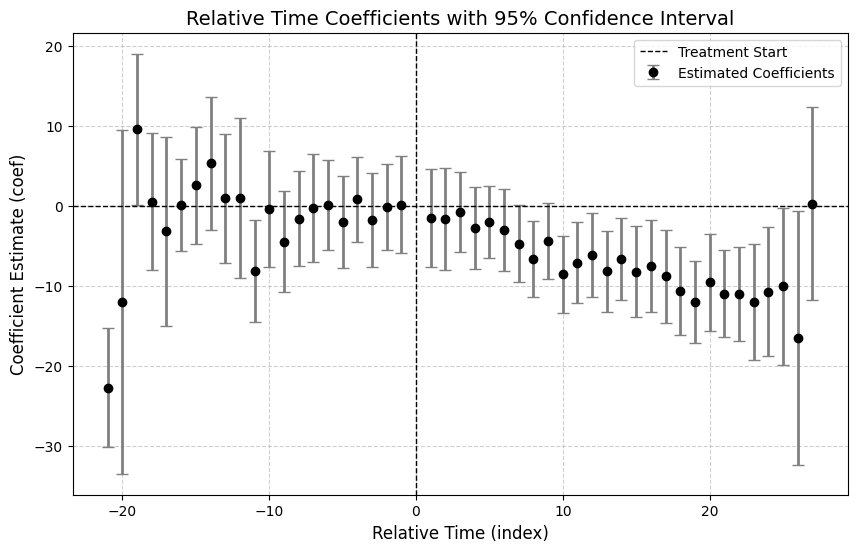

In [10]:
import matplotlib.pyplot as plt

# Configurar o gráfico
plt.figure(figsize=(10, 6))

# Plotar os coeficientes com barras de erro
plt.errorbar(
    est['index'],  # Valores do eixo x
    est['coef'],   # Valores do eixo y (coeficientes)
    yerr=[est['coef'] - est['lower'], est['upper'] - est['coef']],  # Barras de erro
    fmt='o', color='black', ecolor='gray', elinewidth=2, capsize=4, label='Estimated Coefficients'
)

# Adicionar uma linha horizontal no valor 0 para referência
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# Adicionar linha vertical para o início do tratamento em zero
plt.axvline(0, color='black', linestyle='--', linewidth=1, label='Treatment Start')

# Adicionar título e rótulos
plt.title('Relative Time Coefficients with 95% Confidence Interval', fontsize=14)
plt.xlabel('Relative Time (index)', fontsize=12)
plt.ylabel('Coefficient Estimate (coef)', fontsize=12)

# Adicionar grade e legenda
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Exibir o gráfico
plt.show()


#### Considerações sobre o DD

Para que o DD identifique o efeito causal, é importante que tanto indivíduos tratados quanto os de controle permaneçam similares nas suas **características não observáveis** ao longo do tempo, especialmente após a intervenção.

Caso ocorram mudanças expressivas que afetem a composição dos indivíduos que formam os grupos, haverá complicação na comparabilidade temporal. (P. ex., migração entre municípios, habilidades valorizadas em determinados mercados de trabalho, etc).

A perda de comparabilidade dos grupos ao longo do tempo compromete o DD.

De forma geral, o estimador DD **não identificará o efeito causal de interesse** quando houver algum tipo de **característica não observável que varie no tempo** e **afete** simultaneamente a **variável de resultado e a escolha pelo tratamento**. (p.ex. variável de confusão não observável não constante).

#### Boas Práticas para o DD

* Verificar se as características observáveis dos tratados e controles permanecem relativamente estáveis no tempo. 
* É importante tentar verificar se as tendências temporais da variável de resultado entre os grupos são semelhantes antes da intervenção (Event Study).